In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("..")

import pickle
from pathlib import Path
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from plot_config import get_tb_plot_mpl_context, savefig

In [2]:
raw_data_df = pd.read_pickle("norm_eps_vs_igbias_raw_data_df.p")

In [3]:
tdf = raw_data_df[raw_data_df["cell_norm_eps"] == 1e-8][
    ["igate_bias_init_val", "val_ppl"]
]
tdf

,igate_bias_init_val,val_ppl
4,-7,21.288244
8,-5,21.287708
12,-2,21.250767
19,-10,21.205870


In [4]:
tdf["val_ppl"].array

<NumpyExtensionArray>
[np.float64(21.288243679898724), np.float64(21.287708496904116),
 np.float64(21.250766662302393), np.float64(21.205869933123246)]
Length: 4, dtype: float64

In [5]:
pd.DataFrame(
    index=tdf["igate_bias_init_val"], data=tdf["val_ppl"].array, columns=["val_ppl"]
)

,val_ppl
igate_bias_init_val,
-7,21.288244
-5,21.287708
-2,21.250767
-10,21.205870


In [6]:
def create_heatmap_df(
    raw_data_df: pd.DataFrame, columns_col: str, index_col: str, val_col: str
) -> pd.DataFrame:
    index_dfs = []
    for index_val in raw_data_df[columns_col].unique():
        selected_cols_vals = raw_data_df[raw_data_df[columns_col] == index_val]

        val_df = pd.DataFrame(
            index=selected_cols_vals[index_col],
            data=selected_cols_vals[val_col].array,
            columns=[index_val],
        )
        index_dfs.append(val_df)

    return pd.concat(index_dfs, axis=1).sort_index()

In [7]:
heatmap_df = create_heatmap_df(
    raw_data_df=raw_data_df,
    columns_col="igate_bias_init_val",
    index_col="cell_norm_eps",
    val_col="val_ppl",
)
# heatmap_df = heatmap_df.drop(1e-2, axis=0)

In [8]:
heatmap_df = heatmap_df.reindex(sorted(heatmap_df.columns, reverse=True), axis=1)
heatmap_df.index.name = "Norm EPS"
heatmap_df.columns.name = "Input Gate Bias Init"

In [9]:
heatmap_df

Input Gate Bias Init,-2,-5,-7,-10
Norm EPS,,,,
1.000000e-08,21.250767,21.287708,21.288244,21.205870
1.000000e-06,21.316248,21.279485,21.231086,21.040691
1.000000e-05,21.329124,21.244004,21.162504,21.143401
1.000000e-04,21.223351,21.152408,21.019297,21.305637
1.000000e-02,23.296080,23.219195,22.731209,22.134232


In [10]:
import matplotlib as mpl

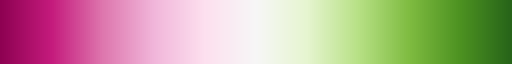

In [11]:
mpl.colormaps["PiYG"]

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Load the PiYG colormap
cmap = plt.cm.PiYG

# Extract the pink side (the upper half of the colormap)
pink_side = cmap(np.linspace(0.0, 0.5, 256))  # Adjust range for pink side
pink_cmap = LinearSegmentedColormap.from_list("PinkSide", pink_side)

# # Example usage: Visualize the new colormap
# fig, ax = plt.subplots(figsize=(6, 2))

# # Create a gradient to visualize the colormap
# gradient = np.linspace(0, 1, 256).reshape(1, -1)
# ax.imshow(gradient, aspect="auto", cmap=pink_cmap)
# ax.set_title("Pink Side of PiYG")
# ax.set_axis_off()

# plt.show()

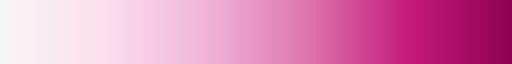

In [13]:
pink_cmap.reversed()

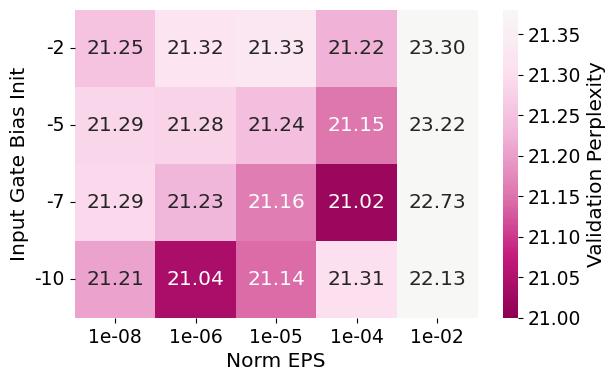

In [14]:
with get_tb_plot_mpl_context():
    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4))
    ax.get_yticklabels
    fig = sns.heatmap(
        ax=ax,
        data=heatmap_df.T,
        # robust=True,
        annot=True,
        fmt=".2f",
        cmap=pink_cmap,
        yticklabels=heatmap_df.columns,
        xticklabels=[f"{x:.0e}" for x in heatmap_df.index],
        vmin=21,
        vmax=21.38,
        cbar=True,
        cbar_kws={"label": "Validation Perplexity"},
    )  # PiYG
    # plt.yticks(rotation=-90)
    ax.set_yticklabels(heatmap_df.columns, rotation=0)
    # ax.set_yticklabels(ax.get_yticklabels(), rotation=90)
plt.show()

In [28]:
# savefig(fig=fig.get_figure(), filename="norm_eps_vs_inputgate_bias_init")